In [ ]:
pip install pandas-profiling

In [ ]:
pip install klib

In [ ]:
 install xgboost

In [ ]:
pip install catboost

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
plt.style.use(['fivethirtyeight'])

%matplotlib inline

#EDA

#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Pandas Profiling Report')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import klib

#klib.missingval_plot(features)
#klib.corr_plot(features, annot=False, figsize=(15,12))
#klib.corr_plot(features, split='high', annot=False, figsize=(15,12))
#klib.cat_plot(features)

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import VotingClassifier
#import lightgbm as lgb

from catboost import CatBoostClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import StackingClassifier

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

In [3]:
path = "/usr/local/share/fonts"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Ubuntu':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

Unknown system...


# 1 **EDA**


In [4]:
train = pd.read_csv(r'/home/ubuntu/바탕화면/Desktop/X_train.csv', encoding='cp949')

test = pd.read_csv(r'/home/ubuntu/바탕화면/Desktop/X_test.csv', encoding='cp949')

y_train = pd.read_csv(r'/home/ubuntu/바탕화면/y_train.csv').gender

train_id = train['cust_id']
test_id = test['cust_id']


tr = pd.concat([train, test]).reset_index(drop=True)
tr

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840,74,606119,-5368000,11264000,12,30,화장품,7,0.527027,45689940.0,51.0
1,1,2136000,3,712000,-300000,2136000,10,25,트래디셔널,67,0.000000,NaN,NaN
2,2,3197000,4,799250,64500,1639000,1,10,남성 캐주얼,355,0.000000,139000.0,2.0
3,3,16077620,44,121837,1800,4935000,12,31,캐주얼,17,0.318182,4411020.0,36.0
4,4,29050000,3,9683333,2050000,24000000,11,28,화장품,47,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,12,14,피혁잡화,30,0.642857,25948000.0,4.0
5978,5978,480000,1,480000,480000,480000,1,22,섬유잡화,343,0.000000,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,12,30,피혁잡화,1,0.915493,4188350.0,10.0
5980,5980,88991520,18,4401970,440000,18120000,12,14,침구/수예,23,0.444444,51869020.0,12.0


In [4]:
y_train

0       0
1       0
2       1
3       1
4       0
       ..
3495    1
3496    1
3497    0
3498    0
3499    0
Name: gender, Length: 3500, dtype: int64

In [5]:
y_train_norm = y_train.copy(deep=True)

In [6]:
y_train_stand= y_train.copy(deep=True)

In [7]:
y_train_po= y_train.copy(deep=True)

In [ ]:
profile = ProfileReport(tr, title='Pandas Profiling Report')

In [ ]:
profile

In [ ]:
klib.missingval_plot(tr)

In [ ]:
klib.corr_plot(tr, annot=False, figsize=(12,10))

In [ ]:
klib.corr_plot(tr, split='high', annot=False, figsize=(12,10))

In [ ]:
klib.cat_plot(tr)

In [ ]:
klib.dist_plot(tr) 

In [ ]:
klib.corr_plot(pd.merge(tr, pd.read_csv(r'C:/Users/MSI/Desktop/Kookmin/machinelearning/clasespython/y_train.csv')), target = 'gender')

In [ ]:
tr.boxplot(figsize= (15,15))

# 2.  **Data cleansing and Feature Enginering**


In [8]:
features = pd.DataFrame({'cust_id': tr.cust_id.unique()})
features

,cust_id
0,0
1,1
2,2
3,3
4,4
...,...
5977,5977
5978,5978
5979,5979
5980,5980


In [9]:
f = tr.groupby('cust_id')['amount'].agg([
    ('총구매액',np.sum), 
    ('구매건수', lambda x: np.size(x)), 
    ('손질평균구매액', lambda x: np.round(stats.trim_mean(x, 0.1))),
    (('최저구매액', np.min)),
    (('최대구매액', np.max)),
]).reset_index()

features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액
0,0,68282840,74,606119,-5368000,11264000
1,1,2136000,3,712000,-300000,2136000
2,2,3197000,4,799250,64500,1639000
3,3,16077620,44,121837,1800,4935000
4,4,29050000,3,9683333,2050000,24000000
...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000
5978,5978,480000,1,480000,480000,480000
5979,5979,260003790,71,2506764,1250,25750000
5980,5980,88991520,18,4401970,440000,18120000


In [10]:
x = pd.to_datetime(tr.tran_date, format="%Y-%m-%d %H:%M").dt.month
x.groupby(features['cust_id'])
features['월'] = x

features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월
0,0,68282840,74,606119,-5368000,11264000,1
1,1,2136000,3,712000,-300000,2136000,3
2,2,3197000,4,799250,64500,1639000,3
3,3,16077620,44,121837,1800,4935000,3
4,4,29050000,3,9683333,2050000,24000000,3
...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2
5978,5978,480000,1,480000,480000,480000,2
5979,5979,260003790,71,2506764,1250,25750000,2
5980,5980,88991520,18,4401970,440000,18120000,2


In [11]:
x = pd.to_datetime(tr.tran_date, format="%Y-%m-%d %H:%M").dt.day
x.groupby(features['cust_id'])
features['일'] = x

features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일
0,0,68282840,74,606119,-5368000,11264000,1,19
1,1,2136000,3,712000,-300000,2136000,3,30
2,2,3197000,4,799250,64500,1639000,3,30
3,3,16077620,44,121837,1800,4935000,3,30
4,4,29050000,3,9683333,2050000,24000000,3,30
...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2,3
5978,5978,480000,1,480000,480000,480000,2,3
5979,5979,260003790,71,2506764,1250,25750000,2,3
5980,5980,88991520,18,4401970,440000,18120000,2,3


In [12]:
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([
    (('최대제품', np.max))
]).reset_index()
features = features.merge(f, how='left', left_index=False); features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품
0,0,68282840,74,606119,-5368000,11264000,1,19,화장품
1,1,2136000,3,712000,-300000,2136000,3,30,트래디셔널
2,2,3197000,4,799250,64500,1639000,3,30,남성 캐주얼
3,3,16077620,44,121837,1800,4935000,3,30,캐주얼
4,4,29050000,3,9683333,2050000,24000000,3,30,화장품
...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2,3,피혁잡화
5978,5978,480000,1,480000,480000,480000,2,3,섬유잡화
5979,5979,260003790,71,2506764,1250,25750000,2,3,피혁잡화
5980,5980,88991520,18,4401970,440000,18120000,2,3,침구/수예


In [13]:
# 휴면 여부
f = tr.groupby('cust_id')['tran_date'].agg([
    ('휴면_여부', lambda x: int((tr.tran_date.astype('datetime64').max() - x.astype('datetime64').max()).days))
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부
0,0,68282840,74,606119,-5368000,11264000,1,19,화장품,7
1,1,2136000,3,712000,-300000,2136000,3,30,트래디셔널,67
2,2,3197000,4,799250,64500,1639000,3,30,남성 캐주얼,355
3,3,16077620,44,121837,1800,4935000,3,30,캐주얼,17
4,4,29050000,3,9683333,2050000,24000000,3,30,화장품,47
...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2,3,피혁잡화,30
5978,5978,480000,1,480000,480000,480000,2,3,섬유잡화,343
5979,5979,260003790,71,2506764,1250,25750000,2,3,피혁잡화,1
5980,5980,88991520,18,4401970,440000,18120000,2,3,침구/수예,23


In [14]:
f = tr.query('gds_grp_mclas_nm == "화장품"').groupby('cust_id')['amount'].agg([
    ('화장품 구매금액', np.sum),
    ('화장품 구매건수', np.size)
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수
0,0,68282840,74,606119,-5368000,11264000,1,19,화장품,7,22450000.0,7.0
1,1,2136000,3,712000,-300000,2136000,3,30,트래디셔널,67,NaN,NaN
2,2,3197000,4,799250,64500,1639000,3,30,남성 캐주얼,355,NaN,NaN
3,3,16077620,44,121837,1800,4935000,3,30,캐주얼,17,NaN,NaN
4,4,29050000,3,9683333,2050000,24000000,3,30,화장품,47,2050000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2,3,피혁잡화,30,NaN,NaN
5978,5978,480000,1,480000,480000,480000,2,3,섬유잡화,343,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,2,3,피혁잡화,1,NaN,NaN
5980,5980,88991520,18,4401970,440000,18120000,2,3,침구/수예,23,NaN,NaN


In [15]:
f = tr.groupby('cust_id')['tran_date'].agg([
       ('평일방문비율', lambda x: np.mean(pd.to_datetime(x).dt.dayofweek>4))
    ]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율
0,0,68282840,74,606119,-5368000,11264000,1,19,화장품,7,22450000.0,7.0,0.527027
1,1,2136000,3,712000,-300000,2136000,3,30,트래디셔널,67,NaN,NaN,0.000000
2,2,3197000,4,799250,64500,1639000,3,30,남성 캐주얼,355,NaN,NaN,0.000000
3,3,16077620,44,121837,1800,4935000,3,30,캐주얼,17,NaN,NaN,0.318182
4,4,29050000,3,9683333,2050000,24000000,3,30,화장품,47,2050000.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2,3,피혁잡화,30,NaN,NaN,0.642857
5978,5978,480000,1,480000,480000,480000,2,3,섬유잡화,343,NaN,NaN,0.000000
5979,5979,260003790,71,2506764,1250,25750000,2,3,피혁잡화,1,NaN,NaN,0.915493
5980,5980,88991520,18,4401970,440000,18120000,2,3,침구/수예,23,NaN,NaN,0.444444


In [16]:
x = []
for i in range(10):
    a= tr.gds_grp_mclas_nm.value_counts().head(10).index[i]
    x.append(a)
x

['기타', '농산물', '가공식품', '축산가공', '수산품', '화장품', '디자이너', '시티웨어', '일용잡화', '육류']

In [17]:
f = tr.query("gds_grp_mclas_nm in {}".format(x)).groupby('cust_id')['amount'].agg([
    ('Top-10 베스트 셀러에 대한 구매 금액', np.sum),
    ('Top-10 베스트 셀러에 대한 구매 건수', np.size)
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840,74,606119,-5368000,11264000,1,19,화장품,7,22450000.0,7.0,0.527027,45689940.0,51.0
1,1,2136000,3,712000,-300000,2136000,3,30,트래디셔널,67,NaN,NaN,0.000000,NaN,NaN
2,2,3197000,4,799250,64500,1639000,3,30,남성 캐주얼,355,NaN,NaN,0.000000,139000.0,2.0
3,3,16077620,44,121837,1800,4935000,3,30,캐주얼,17,NaN,NaN,0.318182,4411020.0,36.0
4,4,29050000,3,9683333,2050000,24000000,3,30,화장품,47,2050000.0,1.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2,3,피혁잡화,30,NaN,NaN,0.642857,25948000.0,4.0
5978,5978,480000,1,480000,480000,480000,2,3,섬유잡화,343,NaN,NaN,0.000000,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,2,3,피혁잡화,1,NaN,NaN,0.915493,4188350.0,10.0
5980,5980,88991520,18,4401970,440000,18120000,2,3,침구/수예,23,NaN,NaN,0.444444,51869020.0,12.0


In [18]:
features.dtypes

cust_id                      int64
총구매액                         int64
구매건수                         int64
손질평균구매액                      int64
최저구매액                        int64
최대구매액                        int64
월                            int64
일                            int64
최대제품                        object
휴면_여부                        int64
화장품 구매금액                   float64
화장품 구매건수                   float64
평일방문비율                     float64
Top-10 베스트 셀러에 대한 구매 금액    float64
Top-10 베스트 셀러에 대한 구매 건수    float64
dtype: object

In [19]:
features1 = features.copy(deep=True)
features1

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840,74,606119,-5368000,11264000,1,19,화장품,7,22450000.0,7.0,0.527027,45689940.0,51.0
1,1,2136000,3,712000,-300000,2136000,3,30,트래디셔널,67,NaN,NaN,0.000000,NaN,NaN
2,2,3197000,4,799250,64500,1639000,3,30,남성 캐주얼,355,NaN,NaN,0.000000,139000.0,2.0
3,3,16077620,44,121837,1800,4935000,3,30,캐주얼,17,NaN,NaN,0.318182,4411020.0,36.0
4,4,29050000,3,9683333,2050000,24000000,3,30,화장품,47,2050000.0,1.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,2,3,피혁잡화,30,NaN,NaN,0.642857,25948000.0,4.0
5978,5978,480000,1,480000,480000,480000,2,3,섬유잡화,343,NaN,NaN,0.000000,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,2,3,피혁잡화,1,NaN,NaN,0.915493,4188350.0,10.0
5980,5980,88991520,18,4401970,440000,18120000,2,3,침구/수예,23,NaN,NaN,0.444444,51869020.0,12.0


In [20]:
cat_features = list(features1.select_dtypes(include=['object']).columns)
num_features = [c for c in features1.iloc[:,1:].columns.tolist() if c not in cat_features]

In [21]:
features1[num_features] = SimpleImputer(strategy='constant', fill_value=0).fit_transform(features1[num_features])
features1[cat_features] = SimpleImputer(strategy="most_frequent").fit_transform(features1[cat_features])

### Outliers

In [22]:
features1[num_features] = features1[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)
features1

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,1.0,19.0,화장품,7.0,22450000.0,7.0,0.527027,45689940.0,51.0
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,3.0,30.0,트래디셔널,67.0,0.0,0.0,0.000000,0.0,0.0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,3.0,30.0,남성 캐주얼,314.0,0.0,0.0,0.000000,139000.0,2.0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,3.0,30.0,캐주얼,17.0,0.0,0.0,0.318182,4411020.0,36.0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,3.0,30.0,화장품,47.0,2050000.0,1.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,2.0,3.0,피혁잡화,30.0,0.0,0.0,0.642857,25948000.0,4.0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,3.0,섬유잡화,314.0,0.0,0.0,0.000000,0.0,0.0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,2.0,3.0,피혁잡화,1.0,0.0,0.0,0.915493,4188350.0,10.0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,2.0,3.0,침구/수예,23.0,0.0,0.0,0.444444,51869020.0,12.0


### Missing values

#우리는 0으로 채운다 왜냐하면 그것은 화장이 없다는 것을 의미하기 때문이다.


In [23]:
features1.isnull().sum()

cust_id                    0
총구매액                       0
구매건수                       0
손질평균구매액                    0
최저구매액                      0
최대구매액                      0
월                          0
일                          0
최대제품                       0
휴면_여부                      0
화장품 구매금액                   0
화장품 구매건수                   0
평일방문비율                     0
Top-10 베스트 셀러에 대한 구매 금액    0
Top-10 베스트 셀러에 대한 구매 건수    0
dtype: int64

In [24]:
features1.fillna(0)

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,1.0,19.0,화장품,7.0,22450000.0,7.0,0.527027,45689940.0,51.0
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,3.0,30.0,트래디셔널,67.0,0.0,0.0,0.000000,0.0,0.0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,3.0,30.0,남성 캐주얼,314.0,0.0,0.0,0.000000,139000.0,2.0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,3.0,30.0,캐주얼,17.0,0.0,0.0,0.318182,4411020.0,36.0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,3.0,30.0,화장품,47.0,2050000.0,1.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,2.0,3.0,피혁잡화,30.0,0.0,0.0,0.642857,25948000.0,4.0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,3.0,섬유잡화,314.0,0.0,0.0,0.000000,0.0,0.0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,2.0,3.0,피혁잡화,1.0,0.0,0.0,0.915493,4188350.0,10.0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,2.0,3.0,침구/수예,23.0,0.0,0.0,0.444444,51869020.0,12.0


### Transform Features

#### A. Min-Max

In [25]:
features_norm = features1.copy(deep=True)

In [26]:
features_norm

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,1.0,19.0,화장품,7.0,22450000.0,7.0,0.527027,45689940.0,51.0
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,3.0,30.0,트래디셔널,67.0,0.0,0.0,0.000000,0.0,0.0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,3.0,30.0,남성 캐주얼,314.0,0.0,0.0,0.000000,139000.0,2.0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,3.0,30.0,캐주얼,17.0,0.0,0.0,0.318182,4411020.0,36.0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,3.0,30.0,화장품,47.0,2050000.0,1.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,2.0,3.0,피혁잡화,30.0,0.0,0.0,0.642857,25948000.0,4.0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,3.0,섬유잡화,314.0,0.0,0.0,0.000000,0.0,0.0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,2.0,3.0,피혁잡화,1.0,0.0,0.0,0.915493,4188350.0,10.0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,2.0,3.0,침구/수예,23.0,0.0,0.0,0.444444,51869020.0,12.0


In [27]:
cat_features_norm = list(features_norm.select_dtypes(include=['object']).columns)
num_features_norm = [c for c in features_norm.iloc[:,1:].columns.tolist() if c not in cat_features_norm]

# 결측값 처리
features_norm[cat_features_norm] = features_norm[cat_features_norm].fillna('None')
features_norm[num_features_norm] = features_norm[num_features_norm].fillna(0)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_norm[num_features_norm]= scaler.fit(features_norm[num_features_norm]).transform(features_norm[num_features_norm])
features_norm

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,0.165388,0.269373,0.081921,0.673439,0.143785,0.000000,0.607143,화장품,0.022137,0.397268,0.538462,0.527027,0.236704,0.239493
1,1,0.004404,0.007380,0.097425,0.883457,0.024876,0.181818,1.000000,트래디셔널,0.213251,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.006986,0.011070,0.110200,0.898561,0.018402,0.181818,1.000000,남성 캐주얼,1.000000,0.000000,0.000000,0.000000,0.000720,0.009392
3,3,0.038334,0.158672,0.011010,0.895963,0.061338,0.181818,1.000000,캐주얼,0.053989,0.000000,0.000000,0.318182,0.022852,0.169054
4,4,0.069905,0.007380,1.000000,0.980840,0.309695,0.181818,1.000000,화장품,0.149546,0.036276,0.076923,0.000000,0.026162,0.009392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.200188,0.047970,0.703338,0.912672,0.309382,0.090909,0.035714,피혁잡화,0.095397,0.000000,0.000000,0.642857,0.134428,0.018784
5978,5978,0.000373,0.000000,0.063454,0.915780,0.003304,0.090909,0.035714,섬유잡화,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5979,5979,0.631988,0.258303,0.360223,0.895940,0.332492,0.090909,0.035714,피혁잡화,0.003026,0.000000,0.000000,0.915493,0.021698,0.046959
5980,5980,0.215788,0.062731,0.637729,0.914122,0.233097,0.090909,0.035714,침구/수예,0.073101,0.000000,0.000000,0.444444,0.268715,0.056351


#### B. Standarization

In [29]:
features_stand = features1.copy(deep=True)

In [30]:
features_stand

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,1.0,19.0,화장품,7.0,22450000.0,7.0,0.527027,45689940.0,51.0
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,3.0,30.0,트래디셔널,67.0,0.0,0.0,0.000000,0.0,0.0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,3.0,30.0,남성 캐주얼,314.0,0.0,0.0,0.000000,139000.0,2.0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,3.0,30.0,캐주얼,17.0,0.0,0.0,0.318182,4411020.0,36.0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,3.0,30.0,화장품,47.0,2050000.0,1.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,2.0,3.0,피혁잡화,30.0,0.0,0.0,0.642857,25948000.0,4.0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,3.0,섬유잡화,314.0,0.0,0.0,0.000000,0.0,0.0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,2.0,3.0,피혁잡화,1.0,0.0,0.0,0.915493,4188350.0,10.0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,2.0,3.0,침구/수예,23.0,0.0,0.0,0.444444,51869020.0,12.0


In [31]:
cat_features_stand = list(features_stand.select_dtypes(include=['object']).columns)
num_features_stand = [c for c in features_stand.iloc[:,1:].columns.tolist() if c not in cat_features_stand]

# 결측값 처리
features_stand[cat_features_stand] = features_stand[cat_features_stand].fillna('None')
features_stand[num_features_stand] = features_stand[num_features_stand].fillna(0)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_stand[num_features_stand]= scaler.fit_transform(features_stand[num_features_stand])

#### C. Power Transformation

In [33]:
features_po = features1.copy(deep=True)

In [34]:
features_po

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,1.0,19.0,화장품,7.0,22450000.0,7.0,0.527027,45689940.0,51.0
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,3.0,30.0,트래디셔널,67.0,0.0,0.0,0.000000,0.0,0.0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,3.0,30.0,남성 캐주얼,314.0,0.0,0.0,0.000000,139000.0,2.0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,3.0,30.0,캐주얼,17.0,0.0,0.0,0.318182,4411020.0,36.0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,3.0,30.0,화장품,47.0,2050000.0,1.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,2.0,3.0,피혁잡화,30.0,0.0,0.0,0.642857,25948000.0,4.0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,3.0,섬유잡화,314.0,0.0,0.0,0.000000,0.0,0.0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,2.0,3.0,피혁잡화,1.0,0.0,0.0,0.915493,4188350.0,10.0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,2.0,3.0,침구/수예,23.0,0.0,0.0,0.444444,51869020.0,12.0


In [35]:
cat_features_po = list(features_po.select_dtypes(include=['object']).columns)
num_features_po = [c for c in features_po.iloc[:,1:].columns.tolist() if c not in cat_features_po]

# 결측값 처리
features_po[cat_features_po] = features_po[cat_features_po].fillna('None')
features_po[num_features_po] = features_po[num_features_po].fillna(0)

In [36]:
features_po[num_features_po] = PowerTransformer(standardize=True).fit_transform(features_po[num_features_po])
features_po

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,0.500815,0.829928,-0.150125,-0.564339,0.129557,-1.735546,0.517707,화장품,-0.822503,1.168763,1.421571,0.961537,0.767658,0.856636
1,1,-1.122743,-1.112149,-0.037725,0.002320,-0.887585,-1.011009,1.505054,트래디셔널,0.469238,-0.924236,-0.881499,-1.318162,-1.928253,-1.631480
2,2,-0.966821,-0.963162,0.044111,0.099866,-1.021675,-1.011009,1.505054,남성 캐주얼,1.527697,-0.924236,-0.881499,-1.318162,-1.010004,-0.933607
3,3,-0.260227,0.493805,-1.175792,0.046580,-0.415818,-1.011009,1.505054,캐주얼,-0.356755,-0.924236,-0.881499,0.328410,-0.162600,0.644700
4,4,0.035095,-1.112149,1.755891,2.339291,0.711345,-1.011009,1.505054,화장품,0.244927,0.939175,0.323351,-1.318162,-0.118247,-0.933607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.611129,-0.232402,1.452372,0.442435,0.710519,-1.356793,-1.524358,피혁잡화,-0.028639,-0.924236,-0.881499,1.227595,0.507551,-0.610715
5978,5978,-1.638093,-1.576152,-0.309784,0.522521,-1.561587,-1.356793,-1.524358,섬유잡화,1.527697,-0.924236,-0.881499,-1.318162,-1.928253,-1.631480
5979,5979,1.333155,0.803103,0.906919,0.046210,0.769898,-1.356793,-1.524358,피혁잡화,-1.557191,-0.924236,-0.881499,1.699113,-0.179315,-0.114317
5980,5980,0.655202,-0.075760,1.369964,0.479670,0.485272,-1.356793,-1.524358,침구/수예,-0.184749,-0.924236,-0.881499,0.738583,0.829483,-0.009451


### Dummies

In [37]:
features1 = pd.get_dummies(features1)
features1

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,1.0,19.0,7.0,22450000.0,...,0,0,0,0,0,0,0,0,0,1
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,3.0,30.0,67.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,3.0,30.0,314.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,3.0,30.0,17.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,3.0,30.0,47.0,2050000.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,2.0,3.0,30.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,3.0,314.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,2.0,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,2.0,3.0,23.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
features_norm = pd.get_dummies(features_norm)
features_norm

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,0.165388,0.269373,0.081921,0.673439,0.143785,0.000000,0.607143,0.022137,0.397268,...,0,0,0,0,0,0,0,0,0,1
1,1,0.004404,0.007380,0.097425,0.883457,0.024876,0.181818,1.000000,0.213251,0.000000,...,0,0,0,0,0,0,0,1,0,0
2,2,0.006986,0.011070,0.110200,0.898561,0.018402,0.181818,1.000000,1.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,3,0.038334,0.158672,0.011010,0.895963,0.061338,0.181818,1.000000,0.053989,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,4,0.069905,0.007380,1.000000,0.980840,0.309695,0.181818,1.000000,0.149546,0.036276,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.200188,0.047970,0.703338,0.912672,0.309382,0.090909,0.035714,0.095397,0.000000,...,0,0,0,0,0,0,0,0,1,0
5978,5978,0.000373,0.000000,0.063454,0.915780,0.003304,0.090909,0.035714,1.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5979,5979,0.631988,0.258303,0.360223,0.895940,0.332492,0.090909,0.035714,0.003026,0.000000,...,0,0,0,0,0,0,0,0,1,0
5980,5980,0.215788,0.062731,0.637729,0.914122,0.233097,0.090909,0.035714,0.073101,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [39]:
features_stand = pd.get_dummies(features_stand)
features_stand

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,-0.138166,0.249115,-0.507375,-0.474831,-0.320017,-1.603523,0.436254,-0.735069,0.925839,...,0,0,0,0,0,0,0,0,0,1
1,1,-0.708338,-0.701238,-0.450189,0.380490,-0.759606,-1.025344,1.682841,-0.143609,-0.530772,...,0,0,0,0,0,0,0,1,0,0
2,2,-0.699192,-0.687853,-0.403066,0.442007,-0.783541,-1.025344,1.682841,2.291236,-0.530772,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.588164,-0.152443,-0.768935,0.431425,-0.624811,-1.025344,1.682841,-0.636492,-0.530772,...,0,0,0,0,1,0,0,0,0,0
4,4,-0.476345,-0.701238,2.879012,0.777098,0.293329,-1.025344,1.682841,-0.340762,-0.397763,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-0.014914,-0.554000,1.784757,0.499473,0.292173,-1.314434,-1.376963,-0.508342,-0.530772,...,0,0,0,0,0,0,0,0,1,0
5978,5978,-0.722612,-0.728009,-0.575492,0.512130,-0.839357,-1.314434,-1.376963,2.291236,-0.530772,...,0,0,0,0,0,0,0,0,0,0
5979,5979,1.514429,0.208960,0.519159,0.431332,0.377606,-1.314434,-1.376963,-0.794215,-0.530772,...,0,0,0,0,0,0,0,0,1,0
5980,5980,0.040339,-0.500459,1.542755,0.505379,0.010157,-1.314434,-1.376963,-0.577346,-0.530772,...,0,0,0,1,0,0,0,0,0,0


In [40]:
features_po = pd.get_dummies(features_po)
features_po

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,0.500815,0.829928,-0.150125,-0.564339,0.129557,-1.735546,0.517707,-0.822503,1.168763,...,0,0,0,0,0,0,0,0,0,1
1,1,-1.122743,-1.112149,-0.037725,0.002320,-0.887585,-1.011009,1.505054,0.469238,-0.924236,...,0,0,0,0,0,0,0,1,0,0
2,2,-0.966821,-0.963162,0.044111,0.099866,-1.021675,-1.011009,1.505054,1.527697,-0.924236,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.260227,0.493805,-1.175792,0.046580,-0.415818,-1.011009,1.505054,-0.356755,-0.924236,...,0,0,0,0,1,0,0,0,0,0
4,4,0.035095,-1.112149,1.755891,2.339291,0.711345,-1.011009,1.505054,0.244927,0.939175,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.611129,-0.232402,1.452372,0.442435,0.710519,-1.356793,-1.524358,-0.028639,-0.924236,...,0,0,0,0,0,0,0,0,1,0
5978,5978,-1.638093,-1.576152,-0.309784,0.522521,-1.561587,-1.356793,-1.524358,1.527697,-0.924236,...,0,0,0,0,0,0,0,0,0,0
5979,5979,1.333155,0.803103,0.906919,0.046210,0.769898,-1.356793,-1.524358,-1.557191,-0.924236,...,0,0,0,0,0,0,0,0,1,0
5980,5980,0.655202,-0.075760,1.369964,0.479670,0.485272,-1.356793,-1.524358,-0.184749,-0.924236,...,0,0,0,1,0,0,0,0,0,0


## Features selection

### Normal data

100%|██████████| 95/95 [02:10<00:00,  1.37s/it]

(49, 0.7096813431884298)


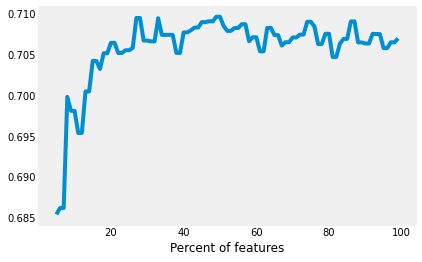

In [41]:
features1 = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features1], axis=1)
X_train = features1.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test = features1.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train, y_train)    
    cv_score = cross_val_score(model, X_new, y_train_norm, scoring='roc_auc', cv=5).mean()
    cv_scores.append((p,cv_score))

best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [42]:
fs = SelectPercentile(percentile=best_score[0]).fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

### Normalized data 

100%|██████████| 95/95 [02:09<00:00,  1.37s/it]

(49, 0.7096952985857584)


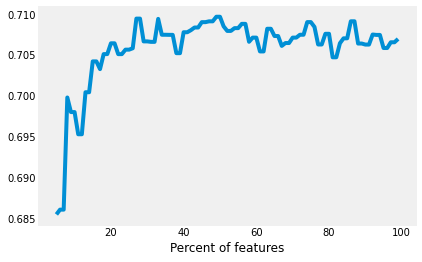

In [43]:
features_norm = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features_norm], axis=1)
X_train_norm = features_norm.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_norm = features_norm.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores_norm = []
for p in tqdm(range(5,100,1)):
    X_new_norm = SelectPercentile(percentile=p).fit_transform(X_train_norm, y_train_norm)    
    cv_score_norm = cross_val_score(model, X_new_norm, y_train_norm, scoring='roc_auc', cv=5).mean()
    cv_scores_norm.append((p,cv_score_norm))

best_score_norm = cv_scores_norm[np.argmax([score for _, score in cv_scores_norm])]
print(best_score_norm)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores_norm])
plt.xlabel('Percent of features')
plt.grid()

In [44]:
fs_norm = SelectPercentile(percentile=best_score[0]).fit(X_train_norm, y_train_norm)
X_train_norm = fs_norm.transform(X_train_norm)
X_test_norm = fs_norm.transform(X_test_norm)

### Standarized data

100%|██████████| 95/95 [02:09<00:00,  1.37s/it]

(49, 0.7096291327213197)


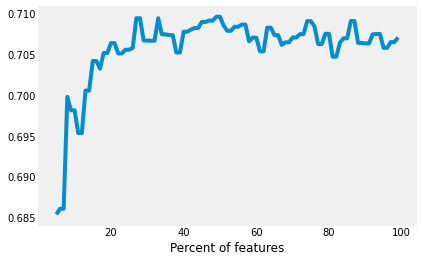

In [45]:
features_stand = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features_stand], axis=1)
X_train_stand = features_stand.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_stand = features_stand.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores_stand = []
for p in tqdm(range(5,100,1)):
    X_new_stand = SelectPercentile(percentile=p).fit_transform(X_train_stand, y_train_stand)    
    cv_score_stand = cross_val_score(model, X_new_stand, y_train_stand, scoring='roc_auc', cv=5).mean()
    cv_scores_stand.append((p,cv_score_stand))

best_score_stand = cv_scores_stand[np.argmax([score for _, score in cv_scores_stand])]
print(best_score_stand)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores_stand])
plt.xlabel('Percent of features')
plt.grid()

In [46]:
fs_stand = SelectPercentile(percentile=best_score[0]).fit(X_train_stand, y_train_stand)
X_train_stand = fs_stand.transform(X_train_stand)
X_test_stand = fs_stand.transform(X_test_stand)

### Power transformation data

100%|██████████| 95/95 [02:09<00:00,  1.36s/it]

(74, 0.7090897753861852)


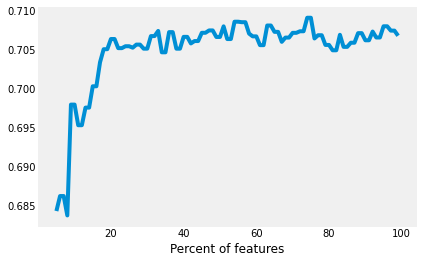

In [47]:
features_po = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features_po], axis=1)
X_train_po = features_po.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_po = features_po.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores_po = []
for p in tqdm(range(5,100,1)):
    X_new_po = SelectPercentile(percentile=p).fit_transform(X_train_po, y_train_po)    
    cv_score_po = cross_val_score(model, X_new_po, y_train_po, scoring='roc_auc', cv=5).mean()
    cv_scores_po.append((p,cv_score_po))

best_score_po = cv_scores_po[np.argmax([score for _, score in cv_scores_po])]
print(best_score_po)

plt.plot([k for k, _ in cv_scores_po], [score for _, score in cv_scores_po])
plt.xlabel('Percent of features')
plt.grid()

In [48]:
fs_po = SelectPercentile(percentile=best_score[0]).fit(X_train_po, y_train_po)
X_train_po = fs.transform(X_train_po)
X_test_po = fs.transform(X_test_po)

# 3. Model construction

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [50]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_train_norm, y_train_norm, test_size=0.3, random_state=0)

In [51]:
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_train_stand, y_train_stand, test_size=0.3, random_state=0)

In [52]:
X_train_po, X_test_po, y_train_po, y_test_po = train_test_split(X_train_po, y_train_po, test_size=0.3, random_state=0)

##### models assignment

In [88]:
clfs = [
    (
        KNeighborsClassifier(),              
        {'n_neighbors': [3,5,7,9,11],        
         'weights': ['uniform','distance']}
    ),
    (
        MLPClassifier(random_state=0),
        {'batch_size': ['auto', 32, 50, 64, 128],
         'learning_rate' : ['constant', 'adaptive'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
    (
        LogisticRegression(random_state=0),  
        {'C': np.arange(0.1, 1.1, 0.1),      
         'penalty': ['l1','l2']}
    ),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5],
         'max_features': (np.arange(0.5, 1.0, 0.1))}
    ),
    (
        GradientBoostingClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [0.01, 0.1, 1]}
    ),
    (
        AdaBoostClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01, 0.001],}
    ),    

     (
         CatBoostClassifier(random_seed=0, od_type="Iter", eval_metric = 'AUC'),
         {'iterations': [50, 100, 150, 200],
          'learning_rate': [1, 0.1, 0.01, 0.001],
          'depth': [3, 4, 5, 6],}
     ),     
]


##### defining a stratified cross validation

In [54]:
#"Stratified cross Validation"을 통해 우리는 더 나은 점수를 받는다.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stra = StratifiedKFold(n_splits = 9)

## Running the models

### Normal data

In [89]:
clfs_tuned = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test, y_test)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, grid_search, clf_score))

 14%|█▍        | 1/7 [00:00<00:02,  2.80it/s]

KNeighborsClassifier                                 0.657149 0.4


 29%|██▊       | 2/7 [00:43<01:06, 13.25s/it]

MLPClassifier                                        0.681317 43.3


 43%|████▎     | 3/7 [00:44<00:37,  9.49s/it]

LogisticRegression                                   0.704162 0.7


 57%|█████▋    | 4/7 [01:16<00:49, 16.34s/it]

RandomForestClassifier                               0.705282 32.3


 71%|███████▏  | 5/7 [01:25<00:28, 14.01s/it]

GradientBoostingClassifier                           0.709071 8.6


 86%|████████▌ | 6/7 [01:33<00:12, 12.34s/it]

AdaBoostClassifier                                   0.714408 8.4
0:	total: 5.49ms	remaining: 818ms
1:	total: 7.74ms	remaining: 573ms
2:	total: 9.94ms	remaining: 487ms
3:	total: 13.1ms	remaining: 478ms
4:	total: 14.9ms	remaining: 431ms
5:	total: 16.6ms	remaining: 399ms
6:	total: 18.4ms	remaining: 376ms
7:	total: 20.1ms	remaining: 357ms
8:	total: 21.7ms	remaining: 340ms
9:	total: 23.4ms	remaining: 328ms
10:	total: 25ms	remaining: 316ms
11:	total: 26.6ms	remaining: 306ms
12:	total: 28.8ms	remaining: 304ms
13:	total: 30.5ms	remaining: 296ms
14:	total: 32ms	remaining: 288ms
15:	total: 33.5ms	remaining: 281ms
16:	total: 35ms	remaining: 274ms
17:	total: 36.6ms	remaining: 268ms
18:	total: 38.1ms	remaining: 263ms
19:	total: 39.7ms	remaining: 258ms
20:	total: 41.2ms	remaining: 253ms
21:	total: 42.8ms	remaining: 249ms
22:	total: 44.7ms	remaining: 247ms
23:	total: 46.2ms	remaining: 243ms
24:	total: 47.8ms	remaining: 239ms
25:	total: 49.2ms	remaining: 235ms
26:	total: 50.8ms	remaining: 231ms
27:	t

100%|██████████| 7/7 [02:31<00:00, 21.62s/it]

112:	total: 202ms	remaining: 66.1ms
113:	total: 206ms	remaining: 65ms
114:	total: 209ms	remaining: 63.5ms
115:	total: 211ms	remaining: 62ms
116:	total: 213ms	remaining: 60.2ms
117:	total: 217ms	remaining: 58.8ms
118:	total: 220ms	remaining: 57.2ms
119:	total: 222ms	remaining: 55.6ms
120:	total: 226ms	remaining: 54.2ms
121:	total: 230ms	remaining: 52.7ms
122:	total: 233ms	remaining: 51.1ms
123:	total: 237ms	remaining: 49.6ms
124:	total: 239ms	remaining: 47.9ms
125:	total: 243ms	remaining: 46.2ms
126:	total: 246ms	remaining: 44.5ms
127:	total: 250ms	remaining: 43ms
128:	total: 253ms	remaining: 41.2ms
129:	total: 256ms	remaining: 39.3ms
130:	total: 260ms	remaining: 37.7ms
131:	total: 262ms	remaining: 35.8ms
132:	total: 264ms	remaining: 33.7ms
133:	total: 266ms	remaining: 31.7ms
134:	total: 267ms	remaining: 29.7ms
135:	total: 269ms	remaining: 27.7ms
136:	total: 270ms	remaining: 25.7ms
137:	total: 272ms	remaining: 23.6ms
138:	total: 274ms	remaining: 21.7ms
139:	total: 277ms	remaining: 19.8m

### Normalized data

In [93]:
clfs_tuned_norm = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train_norm, y_train_norm)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test_norm, y_test_norm)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned_norm.append((clf_name, grid_search, clf_score))

 14%|█▍        | 1/7 [00:00<00:02,  2.43it/s]

KNeighborsClassifier                                 0.688538 0.4


 29%|██▊       | 2/7 [01:52<02:49, 33.91s/it]

MLPClassifier                                        0.720251 112.1


 43%|████▎     | 3/7 [01:53<01:35, 23.93s/it]

LogisticRegression                                   0.719182 0.6


 57%|█████▋    | 4/7 [02:24<01:18, 26.30s/it]

RandomForestClassifier                               0.705243 31.8


 71%|███████▏  | 5/7 [02:33<00:41, 20.97s/it]

GradientBoostingClassifier                           0.709071 8.5


 86%|████████▌ | 6/7 [02:42<00:17, 17.23s/it]

AdaBoostClassifier                                   0.714408 8.5
0:	total: 8.85ms	remaining: 1.32s
1:	total: 11.2ms	remaining: 832ms
2:	total: 13ms	remaining: 638ms
3:	total: 14.8ms	remaining: 541ms
4:	total: 16.6ms	remaining: 480ms
5:	total: 18.5ms	remaining: 443ms
6:	total: 21.6ms	remaining: 442ms
7:	total: 24.3ms	remaining: 432ms
8:	total: 25.9ms	remaining: 406ms
9:	total: 27.6ms	remaining: 386ms
10:	total: 29.2ms	remaining: 368ms
11:	total: 30.8ms	remaining: 354ms
12:	total: 32.3ms	remaining: 340ms
13:	total: 33.9ms	remaining: 329ms
14:	total: 35.6ms	remaining: 320ms
15:	total: 37.2ms	remaining: 311ms
16:	total: 38.7ms	remaining: 303ms
17:	total: 40.2ms	remaining: 295ms
18:	total: 41.7ms	remaining: 288ms
19:	total: 43.2ms	remaining: 281ms
20:	total: 44.7ms	remaining: 275ms
21:	total: 46.2ms	remaining: 269ms
22:	total: 47.6ms	remaining: 263ms
23:	total: 49.1ms	remaining: 258ms
24:	total: 50.6ms	remaining: 253ms
25:	total: 53ms	remaining: 253ms
26:	total: 55ms	remaining: 251ms
27:	t

100%|██████████| 7/7 [03:39<00:00, 31.31s/it]

117:	total: 203ms	remaining: 55.1ms
118:	total: 205ms	remaining: 53.4ms
119:	total: 206ms	remaining: 51.6ms
120:	total: 208ms	remaining: 49.8ms
121:	total: 209ms	remaining: 48ms
122:	total: 211ms	remaining: 46.3ms
123:	total: 212ms	remaining: 44.5ms
124:	total: 214ms	remaining: 42.8ms
125:	total: 215ms	remaining: 41ms
126:	total: 220ms	remaining: 39.8ms
127:	total: 223ms	remaining: 38.2ms
128:	total: 225ms	remaining: 36.6ms
129:	total: 227ms	remaining: 34.9ms
130:	total: 228ms	remaining: 33.1ms
131:	total: 230ms	remaining: 31.3ms
132:	total: 231ms	remaining: 29.6ms
133:	total: 233ms	remaining: 27.8ms
134:	total: 234ms	remaining: 26ms
135:	total: 236ms	remaining: 24.3ms
136:	total: 237ms	remaining: 22.5ms
137:	total: 240ms	remaining: 20.9ms
138:	total: 242ms	remaining: 19.1ms
139:	total: 243ms	remaining: 17.4ms
140:	total: 247ms	remaining: 15.8ms
141:	total: 250ms	remaining: 14.1ms
142:	total: 253ms	remaining: 12.4ms
143:	total: 255ms	remaining: 10.6ms
144:	total: 256ms	remaining: 8.84m

### Standarized data

In [99]:
clfs_tuned_stand = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train_stand, y_train_stand)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test_stand, y_test_stand)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned_stand.append((clf_name, grid_search, clf_score))

 14%|█▍        | 1/7 [00:01<00:10,  1.83s/it]

KNeighborsClassifier                                 0.666986 1.8


 29%|██▊       | 2/7 [02:15<03:27, 41.50s/it]

MLPClassifier                                        0.716379 134.1


 43%|████▎     | 3/7 [02:16<01:57, 29.28s/it]

LogisticRegression                                   0.720713 0.8


 57%|█████▋    | 4/7 [02:48<01:29, 29.94s/it]

RandomForestClassifier                               0.705251 31.5


 71%|███████▏  | 5/7 [02:56<00:46, 23.48s/it]

GradientBoostingClassifier                           0.709537 8.4


 86%|████████▌ | 6/7 [03:04<00:18, 18.91s/it]

AdaBoostClassifier                                   0.714408 8.2
0:	total: 4.42ms	remaining: 659ms
1:	total: 6.79ms	remaining: 502ms
2:	total: 13.2ms	remaining: 645ms
3:	total: 17.5ms	remaining: 638ms
4:	total: 20.9ms	remaining: 605ms
5:	total: 24.1ms	remaining: 578ms
6:	total: 26.3ms	remaining: 537ms
7:	total: 29ms	remaining: 515ms
8:	total: 31.2ms	remaining: 489ms
9:	total: 33.7ms	remaining: 472ms
10:	total: 36.1ms	remaining: 456ms
11:	total: 39.2ms	remaining: 451ms
12:	total: 40.8ms	remaining: 430ms
13:	total: 42.3ms	remaining: 411ms
14:	total: 43.7ms	remaining: 393ms
15:	total: 45.1ms	remaining: 378ms
16:	total: 46.6ms	remaining: 365ms
17:	total: 48.3ms	remaining: 354ms
18:	total: 50.4ms	remaining: 348ms
19:	total: 52.4ms	remaining: 340ms
20:	total: 56.3ms	remaining: 346ms
21:	total: 58.4ms	remaining: 340ms
22:	total: 60.8ms	remaining: 336ms
23:	total: 63.7ms	remaining: 334ms
24:	total: 67.1ms	remaining: 335ms
25:	total: 69.9ms	remaining: 334ms
26:	total: 72.9ms	remaining: 332ms
2

100%|██████████| 7/7 [04:03<00:00, 34.73s/it]

CatBoostClassifier                                   0.708537 58.4


### Power Transformation data

In [103]:
clfs_tuned_po = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train_po, y_train_po)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test_po, y_test_po)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned_po.append((clf_name, grid_search, clf_score))

 14%|█▍        | 1/7 [00:01<00:11,  1.86s/it]

KNeighborsClassifier                                 0.669043 1.9


 29%|██▊       | 2/7 [02:17<03:29, 41.95s/it]

MLPClassifier                                        0.716943 135.5


 43%|████▎     | 3/7 [02:18<01:58, 29.61s/it]

LogisticRegression                                   0.714497 0.8


 57%|█████▋    | 4/7 [02:49<01:30, 30.18s/it]

RandomForestClassifier                               0.705364 31.5


 71%|███████▏  | 5/7 [02:58<00:47, 23.65s/it]

GradientBoostingClassifier                           0.710112 8.4


 86%|████████▌ | 6/7 [03:06<00:18, 18.99s/it]

AdaBoostClassifier                                   0.714408 8.1
0:	total: 3.94ms	remaining: 587ms
1:	total: 6.92ms	remaining: 512ms
2:	total: 8.95ms	remaining: 439ms
3:	total: 11.1ms	remaining: 406ms
4:	total: 12.9ms	remaining: 375ms
5:	total: 14.5ms	remaining: 348ms
6:	total: 16.2ms	remaining: 330ms
7:	total: 17.7ms	remaining: 314ms
8:	total: 19.4ms	remaining: 304ms
9:	total: 21.2ms	remaining: 297ms
10:	total: 23.9ms	remaining: 302ms
11:	total: 26.8ms	remaining: 308ms
12:	total: 29.4ms	remaining: 310ms
13:	total: 31.5ms	remaining: 306ms
14:	total: 34.9ms	remaining: 314ms
15:	total: 37.9ms	remaining: 318ms
16:	total: 39.5ms	remaining: 309ms
17:	total: 41.1ms	remaining: 301ms
18:	total: 42.7ms	remaining: 294ms
19:	total: 44.2ms	remaining: 287ms
20:	total: 45.7ms	remaining: 281ms
21:	total: 47.3ms	remaining: 275ms
22:	total: 48.7ms	remaining: 269ms
23:	total: 50.3ms	remaining: 264ms
24:	total: 52ms	remaining: 260ms
25:	total: 53.4ms	remaining: 255ms
26:	total: 55ms	remaining: 250ms
27:

100%|██████████| 7/7 [04:04<00:00, 34.86s/it]

111:	total: 198ms	remaining: 67.3ms
112:	total: 202ms	remaining: 66.3ms
113:	total: 205ms	remaining: 64.7ms
114:	total: 207ms	remaining: 63.1ms
115:	total: 209ms	remaining: 61.4ms
116:	total: 211ms	remaining: 59.5ms
117:	total: 213ms	remaining: 57.7ms
118:	total: 214ms	remaining: 55.8ms
119:	total: 216ms	remaining: 54ms
120:	total: 217ms	remaining: 52.1ms
121:	total: 219ms	remaining: 50.2ms
122:	total: 220ms	remaining: 48.4ms
123:	total: 222ms	remaining: 46.5ms
124:	total: 223ms	remaining: 44.7ms
125:	total: 225ms	remaining: 42.9ms
126:	total: 228ms	remaining: 41.4ms
127:	total: 230ms	remaining: 39.6ms
128:	total: 233ms	remaining: 37.9ms
129:	total: 235ms	remaining: 36.1ms
130:	total: 238ms	remaining: 34.6ms
131:	total: 241ms	remaining: 32.9ms
132:	total: 244ms	remaining: 31.2ms
133:	total: 247ms	remaining: 29.5ms
134:	total: 249ms	remaining: 27.7ms
135:	total: 252ms	remaining: 26ms
136:	total: 255ms	remaining: 24.2ms
137:	total: 257ms	remaining: 22.3ms
138:	total: 259ms	remaining: 20.

# 5. **Model Ensemble**

### normal data

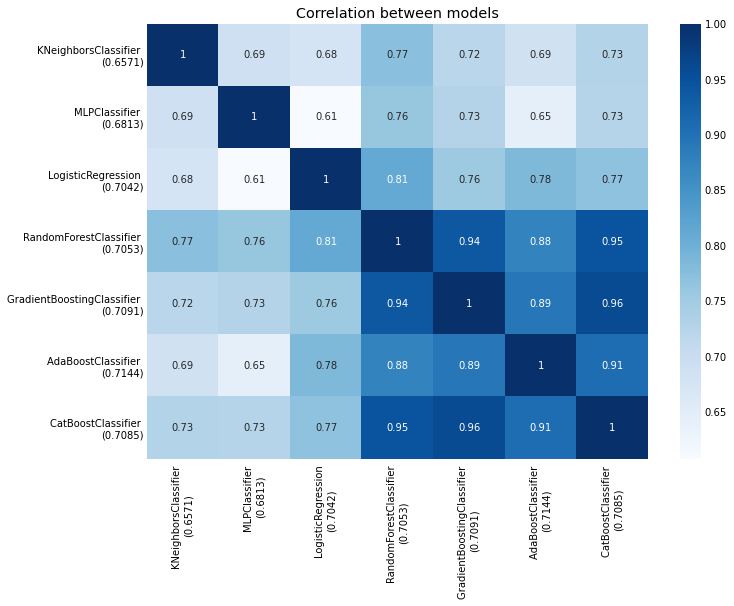

In [90]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_test)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [91]:
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

KNeighborsClassifier \n(0.6571)          0.713048
MLPClassifier \n(0.6813)                 0.692862
LogisticRegression \n(0.7042)            0.734527
RandomForestClassifier \n(0.7053)        0.851534
GradientBoostingClassifier \n(0.7091)    0.832610
AdaBoostClassifier \n(0.7144)            0.798270
CatBoostClassifier \n(0.7085)            0.839806
dtype: float64

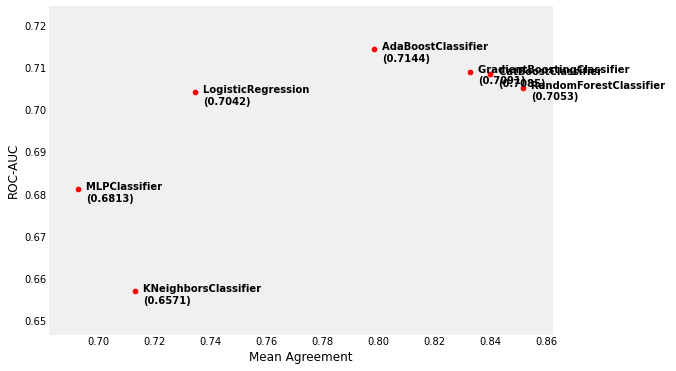

In [92]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

Voting Ensemble

### normalized data

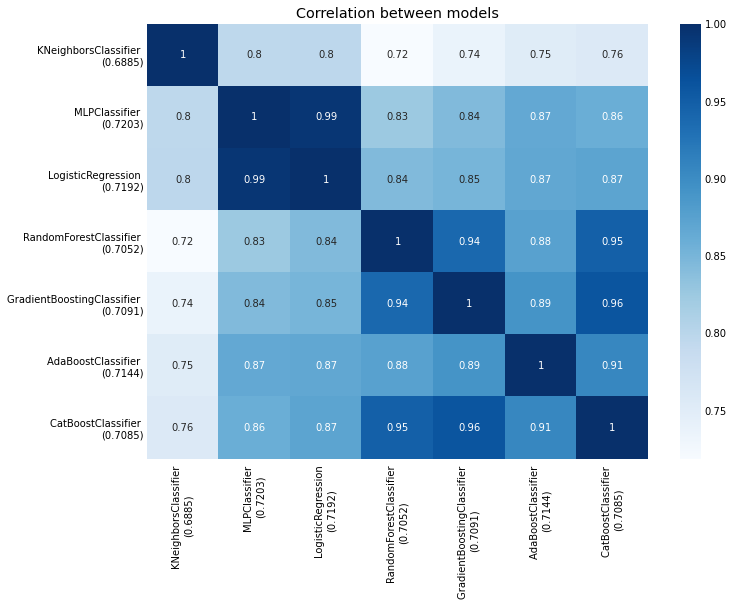

In [94]:
pred_results = []
for name, clf, clf_score in clfs_tuned_norm:
    pred = clf.predict_proba(X_test_norm)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results_norm = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results_norm.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [95]:
(ensemble_results_norm.corr().sum()-1)/(ensemble_results_norm.corr().shape[0]-1)

KNeighborsClassifier \n(0.6885)          0.759892
MLPClassifier \n(0.7203)                 0.864098
LogisticRegression \n(0.7192)            0.870848
RandomForestClassifier \n(0.7052)        0.858428
GradientBoostingClassifier \n(0.7091)    0.870482
AdaBoostClassifier \n(0.7144)            0.860126
CatBoostClassifier \n(0.7085)            0.883824
dtype: float64

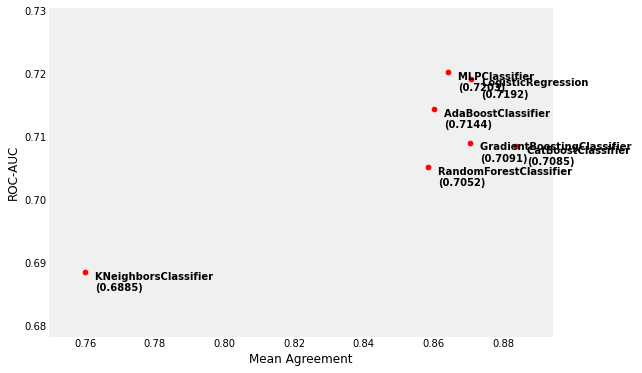

In [105]:
corr = (ensemble_results_norm.corr().sum()-1)/(ensemble_results_norm.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

### Standarized data

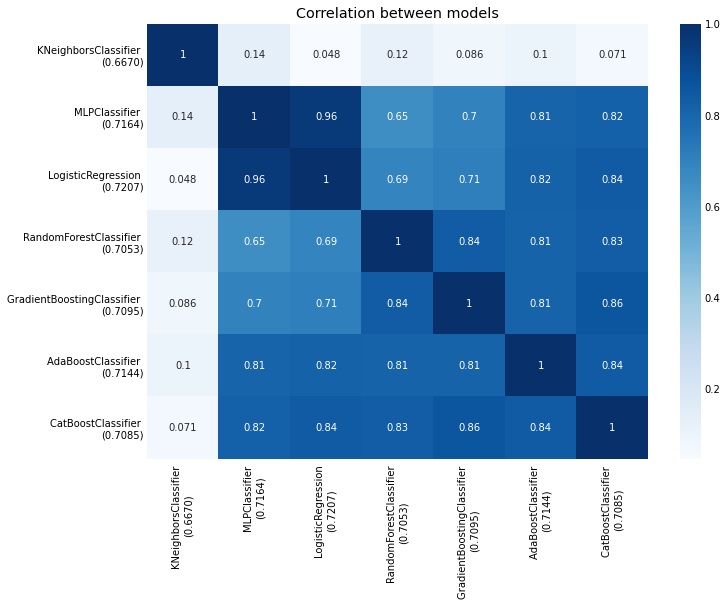

In [100]:
pred_results = []
for name, clf, clf_score in clfs_tuned_stand:
    pred = clf.predict_proba(X_test_norm)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results_stand = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results_stand.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [101]:
(ensemble_results_stand.corr().sum()-1)/(ensemble_results_stand.corr().shape[0]-1)

KNeighborsClassifier \n(0.6670)          0.093135
MLPClassifier \n(0.7164)                 0.680205
LogisticRegression \n(0.7207)            0.678946
RandomForestClassifier \n(0.7053)        0.658790
GradientBoostingClassifier \n(0.7095)    0.668733
AdaBoostClassifier \n(0.7144)            0.698238
CatBoostClassifier \n(0.7085)            0.711314
dtype: float64

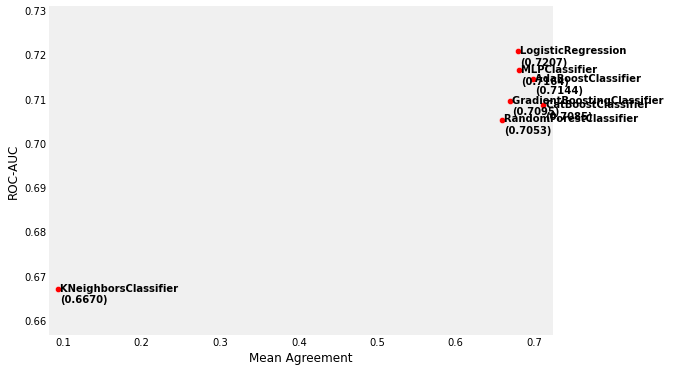

In [102]:
corr = (ensemble_results_stand.corr().sum()-1)/(ensemble_results_stand.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

### Poweful transformation data

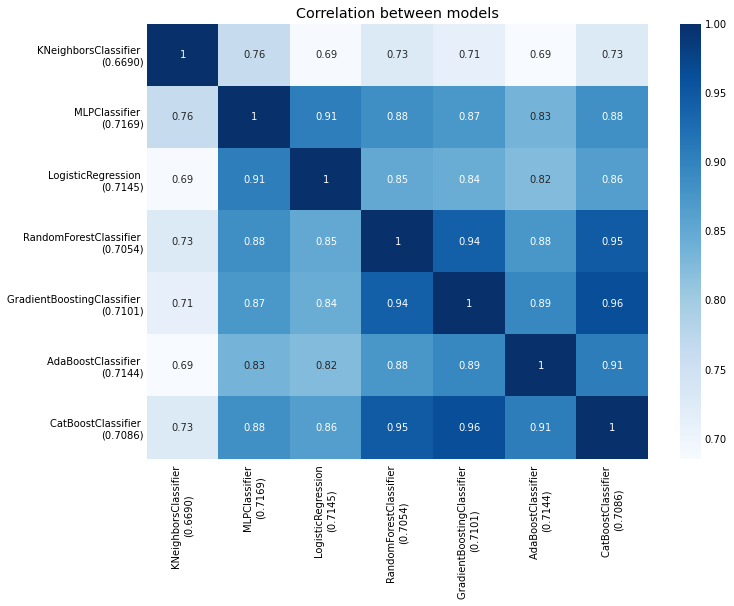

In [104]:
pred_results = []
for name, clf, clf_score in clfs_tuned_po:
    pred = clf.predict_proba(X_test_po)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results_po = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results_po.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [106]:
(ensemble_results_po.corr().sum()-1)/(ensemble_results_po.corr().shape[0]-1)

KNeighborsClassifier \n(0.6690)          0.717050
MLPClassifier \n(0.7169)                 0.857655
LogisticRegression \n(0.7145)            0.829602
RandomForestClassifier \n(0.7054)        0.871012
GradientBoostingClassifier \n(0.7101)    0.871574
AdaBoostClassifier \n(0.7144)            0.836725
CatBoostClassifier \n(0.7086)            0.882410
dtype: float64

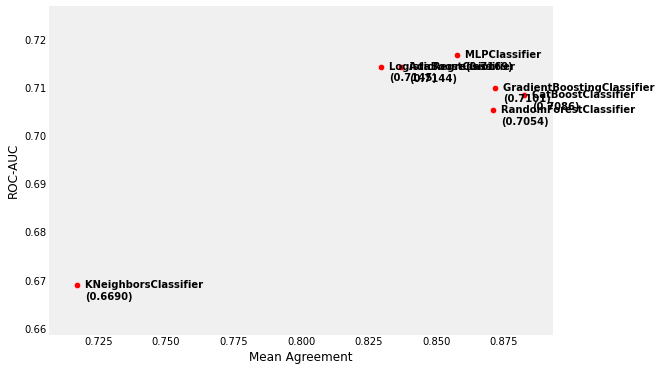

In [107]:
corr = (ensemble_results_po.corr().sum()-1)/(ensemble_results_po.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

## Averaging voting

### Normal data

In [126]:
# Averaging 앙상블에 사용하지 않을 모델은 주석 처리하시오.
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    #'CatboostClassifier' does not improve the score
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [127]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|██████████| 3/3 [00:13<00:00,  4.43s/it]

p=0
LogisticRegression●GradientBoostingClassifier●AdaBoostClassifier
0.7154184004603442


### Normalized data

In [132]:
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned_norm if clf[0] in selected]

In [133]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test_norm)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test_norm)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test_norm, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|██████████| 3/3 [00:07<00:00,  2.45s/it]

p=0
KNeighborsClassifier●MLPClassifier●LogisticRegression●GradientBoostingClassifier
0.7258270342635471


### Standarized data

In [138]:
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned_stand if clf[0] in selected]

In [139]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test_stand)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test_stand)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test_stand, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|██████████| 3/3 [00:07<00:00,  2.46s/it]

p=0
MLPClassifier●LogisticRegression●GradientBoostingClassifier
0.7253279365539164


### Powerful transformation data

In [142]:
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned_po if clf[0] in selected]

In [143]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test_po)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test_po)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test_po, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|██████████| 3/3 [00:07<00:00,  2.49s/it]

p=2.56
MLPClassifier●LogisticRegression●GradientBoostingClassifier
0.721937986620267


In [ ]:

class AveragingClassifier(ClassifierMixin):
    def __init__(self, estimators, p):
        self.estimators = estimators
        self.p = p
    
    def fit(self, X, y):
        return None

    def predict(self, X):
        if self.p == 0:
            pred = gmean([clf.predict(X) for name, clf in estimators], axis=0)
        else:
            preds = [clf.predict(X) for name, clf in estimators]
            pred = (np.sum(np.array(preds)**self.p, axis=0) / len(estimators))**(1/self.p)
        return pred
         
    def predict_proba(self, X):
        if self.p == 0:
            prob = gmean([clf.predict_proba(X) for name, clf in estimators], axis=0)
        else:
            probs = [clf.predict_proba(X) for name, clf in estimators]
            prob = (np.sum(np.array(probs)**self.p, axis=0) / len(estimators))**(1/self.p)
        return prob
    
estimators = [(name, clf) for name, clf, _ in models]
avg_clf = AveragingClassifier(estimators, p)
avg_clf.fit(X_train, y_train)   

### Normal data

In [146]:
# 2-layer stacking

# Initialize 1st level estimators
# 사용하지 않을 모델은 주석 처리하세요.
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected1]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf.fit(X_train, y_train)
print(roc_auc_score(y_test, stk_clf.predict_proba(X_test)[:,1]))  

0.7018272847910247


### Normalized data

In [148]:
# 2-layer stacking
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned_norm if name in selected1]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf.fit(X_train_norm, y_train_norm)
print(roc_auc_score(y_test_norm, stk_clf.predict_proba(X_test_norm)[:,1]))  

0.7239343774587902


### Standarized data

In [149]:
# 2-layer stacking
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned_stand if name in selected1]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf.fit(X_train_stand, y_train_stand)
print(roc_auc_score(y_test_stand, stk_clf.predict_proba(X_test_stand)[:,1]))  

0.7210317817592509


### Powerful transformation data

In [150]:
# 2-layer stacking
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned_po if name in selected1]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf.fit(X_train_po, y_train_po)
print(roc_auc_score(y_test_po, stk_clf.predict_proba(X_test_po)[:,1]))  

0.7201608073247971


In [ ]:
avg_clf.predict(X_test)
print("Test set predictions:\n {}".format(y_test))

#compar y_pred con la parte de la base de datos que definimos como test
print("Test set score: {:.2f}".format(np.mean(y_test == y_test)))

# 7. **Deployment**

In [ ]:
# Averaging ensemble을 적용한 submission: (결과) 0.716574
pd.DataFrame({'cust_id': test_id, 'gender': avg_clf.predict_proba(X_test)[:,1]}).to_csv('submission_avg.csv', index=False)

# Stacking ensemble을 적용한 submission: (결과) 0.717224
pd.DataFrame({'cust_id': test_id, 'gender': stk_clf.predict_proba(X_test)[:,1]}).to_csv('submission_stk.csv', index=False)